In [21]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [22]:
IMAGE_SIZE = [224, 224]

train_path = 'C:\\Users\\1by18\\Downloads\\archive\\chest_xray\\train\\'
valid_path = 'C:\\Users\\1by18\\Downloads\\archive\\chest_xray\\test\\'

In [23]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [24]:
for layer in vgg.layers:
    layer.trainable = False

In [25]:
folders = glob('C:\\Users\\1by18\\Downloads\\archive\\chest_xray\\train\\*')

In [26]:
x = Flatten()(vgg.output)

In [27]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

In [28]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [29]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [30]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
training_set = train_datagen.flow_from_directory('C:\\Users\\1by18\\Downloads\\archive\\chest_xray\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [33]:
test_set = test_datagen.flow_from_directory('C:\\Users\\1by18\\Downloads\\archive\\chest_xray\\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [34]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
163/163 [==============================] - 1360s 8s/step - loss: 0.1828 - accuracy: 0.9310 - val_loss: 0.2493 - val_accuracy: 0.8622
Epoch 2/5
163/163 [==============================] - 1370s 8s/step - loss: 0.1200 - accuracy: 0.9536 - val_loss: 0.1810 - val_accuracy: 0.9071
Epoch 3/5
163/163 [==============================] - 1008s 6s/step - loss: 0.1176 - accuracy: 0.9594 - val_loss: 0.7750 - val_accuracy: 0.9151
Epoch 4/5
163/163 [==============================] - 943s 6s/step - loss: 0.0785 - accuracy: 0.9712 - val_loss: 0.3618 - val_accuracy: 0.9263
Epoch 5/5
163/163 [==============================] - 943s 6s/step - loss: 0.0744 - accuracy: 0.9730 - val_loss: 0.3580 - val_accuracy: 0.9151


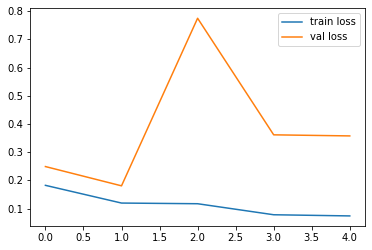

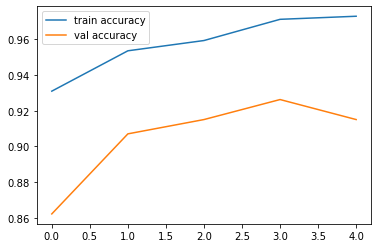

<Figure size 432x288 with 0 Axes>

In [36]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

In [41]:
import tensorflow as tf

from keras.models import load_model

model.save('C:\\Users\\1by18\\Downloads\\archive\\chest_xray\\val\\model_vgg16.h5')

In [42]:
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3